## **Pregunta 1**

El enunciado de esta pregunta pide aprender la estructura de la red bayesiana descrita en función del
dataset entregado y caracterizar los parámetros de dicha red, para posteriormente enunciar y efectuar tres consultas de inferencia sobre la red, así como también documentar la reorganización de los parámetros para cada uno de los casos tras la realización de las consultas.

Para llevar a cabo esto en primera instancia es necesario instalar ciertas librerías como puede observarse a continuación.

In [ ]:
!pip install -U bnlearn
!pip install -U matplotlib


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 48 kB 2.6 MB/s 
     |████████████████████████████████| 47 kB 4.0 MB/s 
     |████████████████████████████████| 47 kB 3.9 MB/s 
     |████████████████████████████████| 47 kB 3.9 MB/s 
     |████████████████████████████████| 47 kB 4.0 MB/s 
     |████████████████████████████████| 47 kB 4.2 MB/s 
     |████████████████████████████████| 46 kB 3.9 MB/s 
     |████████████████████████████████| 216 kB 10.6 MB/s 
     |████████████████████████████████| 11.2 MB 46.4 MB/s 
     |████████████████████████████████| 1.9 MB 50.8 MB/s 
     |████████████████████████████████| 46 kB 3.7 MB/s 
     |████████████████████████████████| 957 kB 45.4 MB/s 
     |████████████████████████████████| 1.6 MB 55.0 MB/s 
  Created wheel for pyvis: filename=pyvis-0.2.1-py3-none-any.whl size=23688 sha256=6f0046503189793b22b01608385d5de3b8c553d0da69fd183e3ca333b58da38d
  Stored in di

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Una vez instaladas las librerías corresponde importarlas al código, cabe destacar que se importan también librerías que ya se encontraban instaladas en el entorno de trabajo.

In [ ]:
import matplotlib as plt
import pandas as pd
import numpy as np
import pgmpy as pg
import bnlearn as bn

A continuación se lee el dataset y se muestran sus dimensiones, esto es logrado mediante el uso de la función *read_csv* presente en la librería **pandas**. Se puede observar que el dataset contiene un millón de filas y siete columnas.

In [ ]:
datos = pd.read_csv('dataset18.csv')
print(datos.shape)

(1000000, 7)


Tras guardar en una variable el dataset leido es posible aprender la estructura base de la red bayesiana que se puede generar a partir de los datos. Esto se logra mediante el uso de la función *structure_learning.fit* presente en la librería **bnlearn**, luego mediante la función *plot* de la misma librería se procede a graficar esta estructura base.

[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn]> Set node properties.
[bnlearn]> Set edge properties.
[bnlearn] >Plot based on Bayesian model


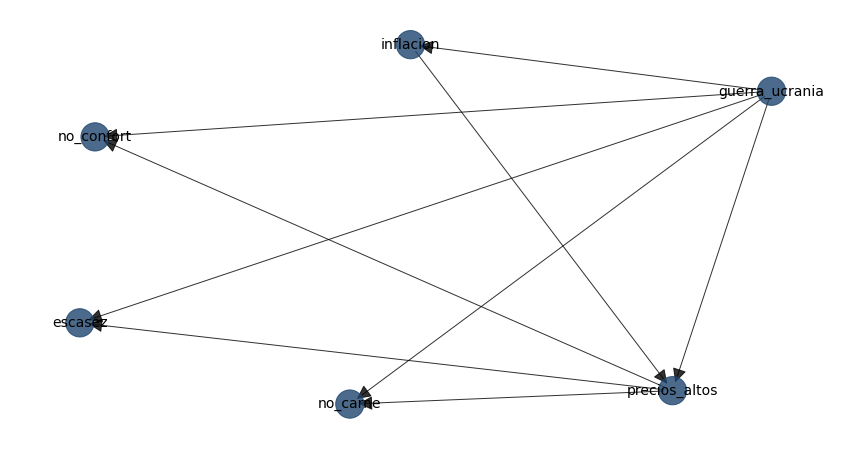

In [ ]:
grafo = bn.structure_learning.fit(datos)
base = bn.plot(grafo)

Luego de aprender y graficar la estructura base de la red resulta conveniente listar los parámetros involucrados en los cálculos y sus posibles valores.
En este caso todos los parámetros son de naturaleza binaria, es decir, solo pueden tomar valores de 1 o 0. Dichos parámetros son los siguientes:

*   inflacion: en caso de existir toma valor 1
*   escasez: en caso de existir toma valor 1
*   guerra_ucrania: en caso de existir toma valor 1
*   no_confort: en caso de ser cierto toma valor 1
*   no_carne: en caso de ser cierto toma valor 1
*   precios_altos: en caso de existir toma valor 1
*   no_alcohol: en caso de ser cierto toma valor 1, podemos notar que este parámetro no forma parte de la estructura base de la red, esto se debe a que en el dataset entregado siempre toma valor 0, dada esta información se puede afirmar que siempre habrá alcohol, por lo que no es un parámetro que afecte a cálculos o inferencias.

Con estas definiciones en consideración ahora corresponde actualizar el modelo mediante el aprendizaje de los parámetros entregados en el dataset y según la importancia de las relaciones entre los distintos nodos del grafo generado. Para poder lograr esto se hace uso de la función *parameter_learning.fit* de la librería **bnlearn** y posteriormente se vuelve a usar la función *plot* para graficar la red bayesiana actualizada.

In [ ]:
actualizar_modelo = bn.parameter_learning.fit(grafo, datos)
red = bn.plot(actualizar_modelo, interactive=True, params_interactive={'notebook':True})

[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >Conversion of adjmat to BayesianNetwork.
[bnlearn] >CPD of inflacion:
+----------------+---------------------+---------------------+
| guerra_ucrania | guerra_ucrania(0)   | guerra_ucrania(1)   |
+----------------+---------------------+---------------------+
| inflacion(0)   | 0.23355777893688653 | 0.06491880877346193 |
+----------------+---------------------+---------------------+
| inflacion(1)   | 0.7664422210631134  | 0.9350811912265381  |
+----------------+---------------------+---------------------+
[bnlearn] >CPD of precios_altos:
+------------------+-----+--------------------+
| guerra_ucrania   | ... | guerra_ucrania(1)  |
+------------------+-----+--------------------+
| inflacion        | ... | inflacion(1)       |
+------------------+-----+--------------------+
| precios_altos(0) | ... | 0.3010583134930571 |
+------------------+-----+--------------------+
| precios_altos(1) | ... | 0.69894168650694

Finalmente se debe estudiar la red generada para entender que consultas sería conveniente realizar, una vez evaluado ese aspecto se debe usar la función *inference.fit* presente en la librería **bnlearn**.

Dada la naturaleza binaria de los parámetros del problema planteado resulta directo pensar en ciertas relaciones causa-efecto que sean candidatas a ser invertidas para transformarse en consultas de inferencia. Bajo esta lógica, se decidió realizar las siguientes consultas.


1.   ¿Cuál es la probabilidad de que no haya confort dado que no hay carne?
2.   ¿Cuál es la probabilidad de que exista escasez e inflación dado que no hay carne?
3.   ¿Cuál es la probabilidad de que exista inflación dado que no hay confort pero si hay carne?

Los resultados de estas consultas pueden verse a continuación.





In [ ]:
inferencia_1 = bn.inference.fit(actualizar_modelo, variables=['no_confort'], evidence={'no_carne':1})
inferencia_2 = bn.inference.fit(actualizar_modelo, variables=['escasez','inflacion'], evidence={'no_carne':1})
inferencia_3 = bn.inference.fit(actualizar_modelo, variables=['inflacion'], evidence={'no_confort':1, 'no_carne':0})

[bnlearn] >Variable Elimination..


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

+----+--------------+----------+
|    |   no_confort |        p |
+====+==============+==========+
|  0 |            0 | 0.413768 |
+----+--------------+----------+
|  1 |            1 | 0.586232 |
+----+--------------+----------+
[bnlearn] >Variable Elimination..


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

+----+-----------+-------------+-----------+
|    |   escasez |   inflacion |         p |
+====+===========+=============+===========+
|  0 |         0 |           0 | 0.0136092 |
+----+-----------+-------------+-----------+
|  1 |         1 |           0 | 0.0441369 |
+----+-----------+-------------+-----------+
|  2 |         0 |           1 | 0.205253  |
+----+-----------+-------------+-----------+
|  3 |         1 |           1 | 0.737001  |
+----+-----------+-------------+-----------+
[bnlearn] >Variable Elimination..


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

+----+-------------+----------+
|    |   inflacion |        p |
+====+=============+==========+
|  0 |           0 | 0.112978 |
+----+-------------+----------+
|  1 |           1 | 0.887022 |
+----+-------------+----------+


Como se puede observar en la sección anterior el programa calcula las probabilidades de las inferencias solicitadas, es asi como podemos notar las respuestas a las preguntas.

1.   La probabilidad de que no haya confort dado que no hay carne es de un 58.62%
2.   La probabilidad de que exista escasez e inflación dado que no hay carne es de un 73.7%, esto corresponde al caso en que ambos parámetros toman valor 1
3.   La probabilidad de que exista inflación dado que no hay confort pero si hay carne es de un 88.7%

Se puede notar además que para todos los casos planteados se elimina el nodo llamado *guerra_ucrania* o el nodo llamado *precios_altos*, ya que ambos nodos poseen el mismo número de conexiones y ambos ocupan una posición "central" en la red. Es mediante este tipo de eliminación que se cumplen los criterios de la independencia condicional dentro de la red bayesiana, los cuales luego derivan en cálculos más sencillos para las inferencias solicitadas.

## **Pregunta 2**

El enunciado de esta pregunta pide realizar RandomWalks de distintos tamaños sobre la matriz otorgada y generar gráficos de líneas que representen las probabilidades de escuchar una canción de alguno de los grupos mencionados en el enunciado.

Para llevar a cabo esto en primera instancia es necesario instalar una librería que facilitará el proceso, dicha instalación puede observarse a continuación.

In [6]:
!pip install pyrandwalk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Tras haber realizado la instalación se debe proceder a importar las librerías necesarias para el desarrollo de la pregunta. Cabe destacar que se importan también librerías que ya se encontraban instaladas en el entorno de trabajo.

In [7]:
from pyrandwalk import *
import numpy as np
import matplotlib.pyplot as plt

A continuación se procede a realizar cuatro RandomWalks de tamaño 10, 100, 1000  y 10000 respectivamente con la ayuda de las funciones *RandomWalk* y *run* presentes en la librería **pyrandwalk**. En primera instancia se configuran los parámetros correspondientes a los calculos de las probabilidades asociadas al problema, luego se escribe la matriz de transiciones T y el vector de estados para poder así realizar el RandomWalk y dentro de cada ciclo llevar a cabo los calculos asociados a los datos necesarios para graficar, este proceso se repite cuatro veces generando cuatro gráficos de linea distintos.

11 estados: [6, 9, 2, 7, 5, 1, 8, 7, 6, 9, 5]


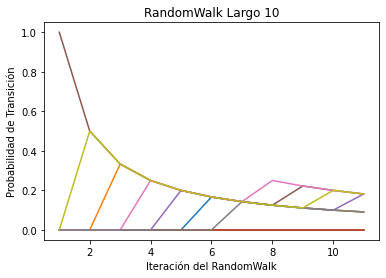

-----------------------------------------------------------------------------------------
101 estados: [4, 6, 4, 5, 4, 2, 9, 5, 1, 7, 3, 7, 9, 1, 1, 7, 8, 2, 9, 3, 9, 8, 3, 4, 7, 5, 2, 8, 2, 4, 7, 4, 8, 7, 9, 3, 8, 5, 2, 7, 7, 5, 2, 3, 4, 6, 1, 4, 2, 2, 1, 1, 7, 5, 4, 7, 3, 7, 9, 2, 7, 5, 4, 4, 7, 4, 5, 6, 9, 5, 4, 5, 8, 3, 4, 4, 7, 4, 2, 1, 1, 9, 6, 3, 4, 4, 5, 4, 5, 2, 9, 3, 8, 2, 9, 2, 8, 4, 4, 6, 1]


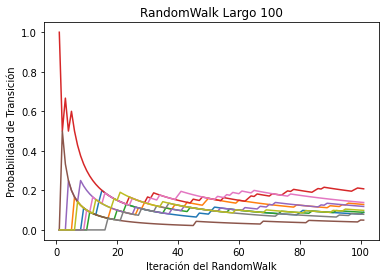

-----------------------------------------------------------------------------------------
1001 estados: [7, 3, 7, 6, 7, 9, 6, 2, 1, 5, 5, 2, 1, 4, 7, 9, 6, 8, 7, 9, 8, 6, 2, 1, 9, 3, 7, 7, 4, 2, 4, 3, 4, 4, 4, 4, 6, 3, 4, 4, 4, 1, 9, 5, 3, 9, 3, 8, 2, 6, 4, 5, 5, 9, 5, 1, 2, 2, 2, 4, 7, 6, 4, 7, 7, 9, 5, 1, 1, 9, 8, 7, 3, 7, 9, 7, 4, 2, 8, 7, 5, 4, 4, 4, 4, 4, 4, 6, 1, 5, 5, 2, 2, 4, 4, 7, 9, 1, 4, 5, 4, 5, 4, 5, 1, 9, 5, 1, 2, 2, 4, 5, 5, 2, 7, 5, 2, 2, 4, 4, 2, 2, 8, 7, 6, 3, 7, 3, 4, 2, 9, 1, 8, 2, 7, 4, 5, 2, 1, 4, 7, 6, 1, 8, 5, 1, 3, 9, 6, 4, 4, 7, 7, 5, 4, 7, 6, 9, 3, 7, 5, 2, 1, 1, 7, 4, 4, 7, 8, 7, 3, 6, 2, 4, 2, 7, 5, 1, 6, 6, 9, 5, 4, 4, 4, 4, 5, 7, 7, 6, 1, 1, 1, 3, 7, 5, 5, 2, 9, 8, 4, 4, 2, 8, 1, 3, 7, 2, 3, 1, 1, 3, 1, 7, 3, 3, 7, 4, 5, 5, 1, 1, 7, 9, 7, 8, 7, 9, 6, 2, 4, 6, 9, 8, 6, 5, 8, 5, 8, 5, 9, 5, 4, 4, 7, 6, 3, 4, 2, 7, 5, 2, 7, 9, 3, 7, 4, 5, 1, 3, 7, 9, 7, 3, 4, 4, 5, 4, 4, 7, 5, 4, 5, 5, 1, 7, 9, 2, 9, 7, 5, 2, 3, 4, 1, 7, 4, 2, 4, 6, 1, 9, 6, 8, 6, 3, 3, 7, 6

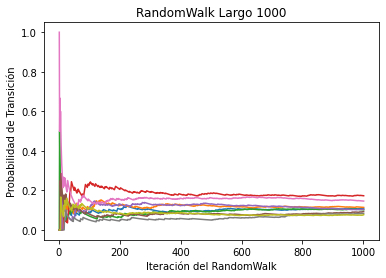

-----------------------------------------------------------------------------------------
10001 estados: [1, 4, 7, 9, 2, 4, 4, 5, 3, 7, 5, 6, 1, 9, 5, 8, 5, 4, 1, 9, 7, 5, 4, 7, 4, 7, 5, 8, 7, 5, 1, 5, 2, 8, 6, 4, 7, 3, 8, 2, 9, 2, 1, 8, 2, 1, 9, 5, 1, 2, 7, 3, 4, 4, 6, 3, 7, 3, 1, 8, 9, 3, 1, 7, 3, 4, 8, 8, 6, 8, 5, 9, 4, 4, 4, 6, 6, 2, 7, 9, 5, 9, 9, 2, 7, 9, 6, 9, 5, 7, 2, 3, 7, 9, 8, 4, 4, 4, 6, 1, 1, 1, 2, 3, 7, 2, 4, 3, 1, 8, 9, 3, 7, 9, 4, 7, 7, 2, 7, 5, 4, 7, 8, 2, 7, 4, 7, 7, 6, 1, 1, 3, 1, 8, 8, 2, 7, 3, 4, 6, 3, 9, 6, 1, 9, 3, 7, 9, 2, 4, 4, 3, 7, 4, 3, 7, 4, 2, 3, 1, 8, 9, 7, 8, 1, 1, 5, 1, 1, 5, 5, 4, 5, 8, 2, 7, 9, 6, 3, 7, 3, 8, 6, 8, 1, 4, 7, 5, 4, 6, 9, 1, 1, 7, 4, 1, 5, 5, 1, 8, 6, 1, 1, 8, 1, 3, 3, 8, 5, 3, 7, 9, 1, 1, 1, 8, 7, 3, 4, 4, 7, 2, 1, 8, 8, 4, 4, 1, 2, 2, 8, 2, 7, 4, 4, 1, 9, 4, 2, 2, 1, 1, 1, 1, 9, 3, 4, 4, 2, 2, 9, 3, 1, 1, 7, 3, 4, 4, 4, 2, 7, 7, 2, 9, 5, 4, 4, 4, 4, 4, 4, 3, 9, 5, 6, 2, 7, 9, 1, 1, 1, 4, 8, 6, 9, 3, 4, 4, 4, 7, 5, 9, 1, 7, 6, 4, 5, 1, 

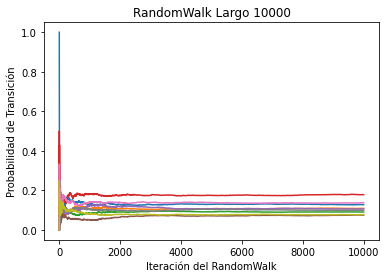

-----------------------------------------------------------------------------------------


In [17]:
c1=[]
c2=[]
c3=[]
c4=[]
c5=[]
c6=[]
c7=[]
c8=[]
c9=[]

cont1 = 0
cont2 = 0
cont3 = 0
cont4 = 0
cont5 = 0
cont6 = 0
cont7 = 0
cont8 = 0
cont9 = 0
T = np.array([[0.25, 0.06, 0.08, 0.15, 0.04, 0.02, 0.15, 0.15, 0.10], [0.15, 0.15, 0.10, 0.22, 0.01, 0.02, 0.15, 0.10, 0.10], [0.12, 0.00, 0.05, 0.24, 0.14, 0.04, 0.27, 0.07, 0.07], [0.05, 0.13, 0.05, 0.30, 0.10, 0.10, 0.22, 0.05, 0.00], [0.18, 0.20, 0.07, 0.20, 0.15, 0.05, 0.05, 0.05, 0.05], [0.20, 0.10, 0.20, 0.05, 0.05, 0.10, 0.02, 0.15, 0.13], [0.01, 0.05, 0.15, 0.14, 0.17, 0.10, 0.12, 0.10, 0.16], [0.17, 0.15, 0.07, 0.07, 0.15, 0.10, 0.12, 0.09, 0.08], [0.13, 0.11, 0.13, 0.03, 0.20, 0.20, 0.04, 0.15, 0.01]])

estados = [1, 2, 3, 4, 5, 6, 7, 8, 9]
rw = RandomWalk(estados, T)
estados, probs = rw.run()
print ("11 estados:", estados)
r = range(1,12)
for n in r:
  if estados[n-1] == 1:
    cont1 += 1
    c1.append(cont1/n)
    c2.append(cont2/n)
    c3.append(cont3/n)
    c4.append(cont4/n)
    c5.append(cont5/n)
    c6.append(cont6/n)
    c7.append(cont7/n)
    c8.append(cont8/n)
    c9.append(cont9/n)
  elif estados[n-1] == 2:
    cont2 += 1
    c1.append(cont1/n)
    c2.append(cont2/n)
    c3.append(cont3/n)
    c4.append(cont4/n)
    c5.append(cont5/n)
    c6.append(cont6/n)
    c7.append(cont7/n)
    c8.append(cont8/n)
    c9.append(cont9/n)
  elif estados[n-1] == 3:
    cont3 += 1
    c1.append(cont1/n)
    c2.append(cont2/n)
    c3.append(cont3/n)
    c4.append(cont4/n)
    c5.append(cont5/n)
    c6.append(cont6/n)
    c7.append(cont7/n)
    c8.append(cont8/n)
    c9.append(cont9/n)
  elif estados[n-1] == 4:
    cont4 += 1
    c1.append(cont1/n)
    c2.append(cont2/n)
    c3.append(cont3/n)
    c4.append(cont4/n)
    c5.append(cont5/n)
    c6.append(cont6/n)
    c7.append(cont7/n)
    c8.append(cont8/n)
    c9.append(cont9/n)
  elif estados[n-1] == 5:
    cont5 += 1
    c1.append(cont1/n)
    c2.append(cont2/n)
    c3.append(cont3/n)
    c4.append(cont4/n)
    c5.append(cont5/n)
    c6.append(cont6/n)
    c7.append(cont7/n)
    c8.append(cont8/n)
    c9.append(cont9/n)
  elif estados[n-1] == 6:
    cont6 += 1
    c1.append(cont1/n)
    c2.append(cont2/n)
    c3.append(cont3/n)
    c4.append(cont4/n)
    c5.append(cont5/n)
    c6.append(cont6/n)
    c7.append(cont7/n)
    c8.append(cont8/n)
    c9.append(cont9/n)
  elif estados[n-1] == 7:
    cont7 += 1
    c1.append(cont1/n)
    c2.append(cont2/n)
    c3.append(cont3/n)
    c4.append(cont4/n)
    c5.append(cont5/n)
    c6.append(cont6/n)
    c7.append(cont7/n)
    c8.append(cont8/n)
    c9.append(cont9/n)
  elif estados[n-1] == 8:
    cont8 += 1
    c1.append(cont1/n)
    c2.append(cont2/n)
    c3.append(cont3/n)
    c4.append(cont4/n)
    c5.append(cont5/n)
    c6.append(cont6/n)
    c7.append(cont7/n)
    c8.append(cont8/n)
    c9.append(cont9/n)
  elif estados[n-1] == 9:
    cont9 += 1
    c1.append(cont1/n)
    c2.append(cont2/n)
    c3.append(cont3/n)
    c4.append(cont4/n)
    c5.append(cont5/n)
    c6.append(cont6/n)
    c7.append(cont7/n)
    c8.append(cont8/n)
    c9.append(cont9/n)

x1 = r
y1 = c1
x2 = r
y2 = c2
x3 = r
y3 = c3
x4 = r
y4 = c4
x5 = r
y5 = c5
x6 = r
y6 = c6
x7 = r
y7 = c7
x8 = r
y8 = c8
x9 = r
y9 = c9

plt.plot(x1, y1)
plt.plot(x2, y2)
plt.plot(x3, y3)
plt.plot(x4, y4)
plt.plot(x5, y5)
plt.plot(x6, y6)
plt.plot(x7, y7)
plt.plot(x8, y8)
plt.plot(x9, y9)

plt.xlabel("Iteración del RandomWalk")
plt.ylabel("Probabilidad de Transición")
plt.title('RandomWalk Largo 10')
plt.show()
print ("-----------------------------------------------------------------------------------------")
c1=[]
c2=[]
c3=[]
c4=[]
c5=[]
c6=[]
c7=[]
c8=[]
c9=[]

cont1 = 0
cont2 = 0
cont3 = 0
cont4 = 0
cont5 = 0
cont6 = 0
cont7 = 0
cont8 = 0
cont9 = 0

estados, probs = rw.run(ntimes=100)
print ("101 estados:", estados)
r = range(1,102)
for n in r:
  if estados[n-1] == 1:
    cont1 += 1
    c1.append(cont1/n)
    c2.append(cont2/n)
    c3.append(cont3/n)
    c4.append(cont4/n)
    c5.append(cont5/n)
    c6.append(cont6/n)
    c7.append(cont7/n)
    c8.append(cont8/n)
    c9.append(cont9/n)
  elif estados[n-1] == 2:
    cont2 += 1
    c1.append(cont1/n)
    c2.append(cont2/n)
    c3.append(cont3/n)
    c4.append(cont4/n)
    c5.append(cont5/n)
    c6.append(cont6/n)
    c7.append(cont7/n)
    c8.append(cont8/n)
    c9.append(cont9/n)
  elif estados[n-1] == 3:
    cont3 += 1
    c1.append(cont1/n)
    c2.append(cont2/n)
    c3.append(cont3/n)
    c4.append(cont4/n)
    c5.append(cont5/n)
    c6.append(cont6/n)
    c7.append(cont7/n)
    c8.append(cont8/n)
    c9.append(cont9/n)
  elif estados[n-1] == 4:
    cont4 += 1
    c1.append(cont1/n)
    c2.append(cont2/n)
    c3.append(cont3/n)
    c4.append(cont4/n)
    c5.append(cont5/n)
    c6.append(cont6/n)
    c7.append(cont7/n)
    c8.append(cont8/n)
    c9.append(cont9/n)
  elif estados[n-1] == 5:
    cont5 += 1
    c1.append(cont1/n)
    c2.append(cont2/n)
    c3.append(cont3/n)
    c4.append(cont4/n)
    c5.append(cont5/n)
    c6.append(cont6/n)
    c7.append(cont7/n)
    c8.append(cont8/n)
    c9.append(cont9/n)
  elif estados[n-1] == 6:
    cont6 += 1
    c1.append(cont1/n)
    c2.append(cont2/n)
    c3.append(cont3/n)
    c4.append(cont4/n)
    c5.append(cont5/n)
    c6.append(cont6/n)
    c7.append(cont7/n)
    c8.append(cont8/n)
    c9.append(cont9/n)
  elif estados[n-1] == 7:
    cont7 += 1
    c1.append(cont1/n)
    c2.append(cont2/n)
    c3.append(cont3/n)
    c4.append(cont4/n)
    c5.append(cont5/n)
    c6.append(cont6/n)
    c7.append(cont7/n)
    c8.append(cont8/n)
    c9.append(cont9/n)
  elif estados[n-1] == 8:
    cont8 += 1
    c1.append(cont1/n)
    c2.append(cont2/n)
    c3.append(cont3/n)
    c4.append(cont4/n)
    c5.append(cont5/n)
    c6.append(cont6/n)
    c7.append(cont7/n)
    c8.append(cont8/n)
    c9.append(cont9/n)
  elif estados[n-1] == 9:
    cont9 += 1
    c1.append(cont1/n)
    c2.append(cont2/n)
    c3.append(cont3/n)
    c4.append(cont4/n)
    c5.append(cont5/n)
    c6.append(cont6/n)
    c7.append(cont7/n)
    c8.append(cont8/n)
    c9.append(cont9/n)

x1 = r
y1 = c1
x2 = r
y2 = c2
x3 = r
y3 = c3
x4 = r
y4 = c4
x5 = r
y5 = c5
x6 = r
y6 = c6
x7 = r
y7 = c7
x8 = r
y8 = c8
x9 = r
y9 = c9

plt.plot(x1, y1)
plt.plot(x2, y2)
plt.plot(x3, y3)
plt.plot(x4, y4)
plt.plot(x5, y5)
plt.plot(x6, y6)
plt.plot(x7, y7)
plt.plot(x8, y8)
plt.plot(x9, y9)

plt.xlabel("Iteración del RandomWalk")
plt.ylabel("Probabilidad de Transición")
plt.title('RandomWalk Largo 100')
plt.show()
print ("-----------------------------------------------------------------------------------------")
c1=[]
c2=[]
c3=[]
c4=[]
c5=[]
c6=[]
c7=[]
c8=[]
c9=[]

cont1 = 0
cont2 = 0
cont3 = 0
cont4 = 0
cont5 = 0
cont6 = 0
cont7 = 0
cont8 = 0
cont9 = 0

estados, probs = rw.run(ntimes=1000)
print ("1001 estados:", estados)
r = range(1,1002)
for n in r:
  if estados[n-1] == 1:
    cont1 += 1
    c1.append(cont1/n)
    c2.append(cont2/n)
    c3.append(cont3/n)
    c4.append(cont4/n)
    c5.append(cont5/n)
    c6.append(cont6/n)
    c7.append(cont7/n)
    c8.append(cont8/n)
    c9.append(cont9/n)
  elif estados[n-1] == 2:
    cont2 += 1
    c1.append(cont1/n)
    c2.append(cont2/n)
    c3.append(cont3/n)
    c4.append(cont4/n)
    c5.append(cont5/n)
    c6.append(cont6/n)
    c7.append(cont7/n)
    c8.append(cont8/n)
    c9.append(cont9/n)
  elif estados[n-1] == 3:
    cont3 += 1
    c1.append(cont1/n)
    c2.append(cont2/n)
    c3.append(cont3/n)
    c4.append(cont4/n)
    c5.append(cont5/n)
    c6.append(cont6/n)
    c7.append(cont7/n)
    c8.append(cont8/n)
    c9.append(cont9/n)
  elif estados[n-1] == 4:
    cont4 += 1
    c1.append(cont1/n)
    c2.append(cont2/n)
    c3.append(cont3/n)
    c4.append(cont4/n)
    c5.append(cont5/n)
    c6.append(cont6/n)
    c7.append(cont7/n)
    c8.append(cont8/n)
    c9.append(cont9/n)
  elif estados[n-1] == 5:
    cont5 += 1
    c1.append(cont1/n)
    c2.append(cont2/n)
    c3.append(cont3/n)
    c4.append(cont4/n)
    c5.append(cont5/n)
    c6.append(cont6/n)
    c7.append(cont7/n)
    c8.append(cont8/n)
    c9.append(cont9/n)
  elif estados[n-1] == 6:
    cont6 += 1
    c1.append(cont1/n)
    c2.append(cont2/n)
    c3.append(cont3/n)
    c4.append(cont4/n)
    c5.append(cont5/n)
    c6.append(cont6/n)
    c7.append(cont7/n)
    c8.append(cont8/n)
    c9.append(cont9/n)
  elif estados[n-1] == 7:
    cont7 += 1
    c1.append(cont1/n)
    c2.append(cont2/n)
    c3.append(cont3/n)
    c4.append(cont4/n)
    c5.append(cont5/n)
    c6.append(cont6/n)
    c7.append(cont7/n)
    c8.append(cont8/n)
    c9.append(cont9/n)
  elif estados[n-1] == 8:
    cont8 += 1
    c1.append(cont1/n)
    c2.append(cont2/n)
    c3.append(cont3/n)
    c4.append(cont4/n)
    c5.append(cont5/n)
    c6.append(cont6/n)
    c7.append(cont7/n)
    c8.append(cont8/n)
    c9.append(cont9/n)
  elif estados[n-1] == 9:
    cont9 += 1
    c1.append(cont1/n)
    c2.append(cont2/n)
    c3.append(cont3/n)
    c4.append(cont4/n)
    c5.append(cont5/n)
    c6.append(cont6/n)
    c7.append(cont7/n)
    c8.append(cont8/n)
    c9.append(cont9/n)

x1 = r
y1 = c1
x2 = r
y2 = c2
x3 = r
y3 = c3
x4 = r
y4 = c4
x5 = r
y5 = c5
x6 = r
y6 = c6
x7 = r
y7 = c7
x8 = r
y8 = c8
x9 = r
y9 = c9

plt.plot(x1, y1)
plt.plot(x2, y2)
plt.plot(x3, y3)
plt.plot(x4, y4)
plt.plot(x5, y5)
plt.plot(x6, y6)
plt.plot(x7, y7)
plt.plot(x8, y8)
plt.plot(x9, y9)

plt.xlabel("Iteración del RandomWalk")
plt.ylabel("Probabilidad de Transición")
plt.title('RandomWalk Largo 1000')
plt.show()
print ("-----------------------------------------------------------------------------------------")
c1=[]
c2=[]
c3=[]
c4=[]
c5=[]
c6=[]
c7=[]
c8=[]
c9=[]

cont1 = 0
cont2 = 0
cont3 = 0
cont4 = 0
cont5 = 0
cont6 = 0
cont7 = 0
cont8 = 0
cont9 = 0
estados, probs = rw.run(ntimes=10000)
print ("10001 estados:", estados)
r = range(1,10002)
for n in r:
  if estados[n-1] == 1:
    cont1 += 1
    c1.append(cont1/n)
    c2.append(cont2/n)
    c3.append(cont3/n)
    c4.append(cont4/n)
    c5.append(cont5/n)
    c6.append(cont6/n)
    c7.append(cont7/n)
    c8.append(cont8/n)
    c9.append(cont9/n)
  elif estados[n-1] == 2:
    cont2 += 1
    c1.append(cont1/n)
    c2.append(cont2/n)
    c3.append(cont3/n)
    c4.append(cont4/n)
    c5.append(cont5/n)
    c6.append(cont6/n)
    c7.append(cont7/n)
    c8.append(cont8/n)
    c9.append(cont9/n)
  elif estados[n-1] == 3:
    cont3 += 1
    c1.append(cont1/n)
    c2.append(cont2/n)
    c3.append(cont3/n)
    c4.append(cont4/n)
    c5.append(cont5/n)
    c6.append(cont6/n)
    c7.append(cont7/n)
    c8.append(cont8/n)
    c9.append(cont9/n)
  elif estados[n-1] == 4:
    cont4 += 1
    c1.append(cont1/n)
    c2.append(cont2/n)
    c3.append(cont3/n)
    c4.append(cont4/n)
    c5.append(cont5/n)
    c6.append(cont6/n)
    c7.append(cont7/n)
    c8.append(cont8/n)
    c9.append(cont9/n)
  elif estados[n-1] == 5:
    cont5 += 1
    c1.append(cont1/n)
    c2.append(cont2/n)
    c3.append(cont3/n)
    c4.append(cont4/n)
    c5.append(cont5/n)
    c6.append(cont6/n)
    c7.append(cont7/n)
    c8.append(cont8/n)
    c9.append(cont9/n)
  elif estados[n-1] == 6:
    cont6 += 1
    c1.append(cont1/n)
    c2.append(cont2/n)
    c3.append(cont3/n)
    c4.append(cont4/n)
    c5.append(cont5/n)
    c6.append(cont6/n)
    c7.append(cont7/n)
    c8.append(cont8/n)
    c9.append(cont9/n)
  elif estados[n-1] == 7:
    cont7 += 1
    c1.append(cont1/n)
    c2.append(cont2/n)
    c3.append(cont3/n)
    c4.append(cont4/n)
    c5.append(cont5/n)
    c6.append(cont6/n)
    c7.append(cont7/n)
    c8.append(cont8/n)
    c9.append(cont9/n)
  elif estados[n-1] == 8:
    cont8 += 1
    c1.append(cont1/n)
    c2.append(cont2/n)
    c3.append(cont3/n)
    c4.append(cont4/n)
    c5.append(cont5/n)
    c6.append(cont6/n)
    c7.append(cont7/n)
    c8.append(cont8/n)
    c9.append(cont9/n)
  elif estados[n-1] == 9:
    cont9 += 1
    c1.append(cont1/n)
    c2.append(cont2/n)
    c3.append(cont3/n)
    c4.append(cont4/n)
    c5.append(cont5/n)
    c6.append(cont6/n)
    c7.append(cont7/n)
    c8.append(cont8/n)
    c9.append(cont9/n)

x1 = r
y1 = c1
x2 = r
y2 = c2
x3 = r
y3 = c3
x4 = r
y4 = c4
x5 = r
y5 = c5
x6 = r
y6 = c6
x7 = r
y7 = c7
x8 = r
y8 = c8
x9 = r
y9 = c9

plt.plot(x1, y1)
plt.plot(x2, y2)
plt.plot(x3, y3)
plt.plot(x4, y4)
plt.plot(x5, y5)
plt.plot(x6, y6)
plt.plot(x7, y7)
plt.plot(x8, y8)
plt.plot(x9, y9)

plt.xlabel("Iteración del RandomWalk")
plt.ylabel("Probabilidad de Transición")
plt.title('RandomWalk Largo 10000')
plt.show()
print ("-----------------------------------------------------------------------------------------")

Se puede notar como además de cada gráfico generado, los resultados presentan una lista con los n+1 (largo del RandomWalk + estado inicial) estados por los que se transitó en la realización de cada RandomWalk. Se puede notar además una tendencia entre los gráficos, los cuales muestran resultados similares entre sí independientemente de la cantidad de datos de cada caso.

Finalmente la parte b de la pregunta pide realizar una comparación entre los resultados obtenidos y la distribución estacionaria de Markov para el problema planteado. Para lograr esto en primera instancia se debe resolver el sistema de ecuaciones planteado en clases.

πT = π

π1 + π2 + π3 + ... + πn = 1

Tras encontrar los valores del vector π se puede generar un gráfico asociado a su distribución de probabilidad, el cual en teoría debería ser similar a los gráficos generados en el punto anterior.